In [63]:
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import fabs
from math import log
%matplotlib inline

In [100]:
# Ниже реализованы функции, которые считают погрешности для коэффициентов k и с, 
# найденных с помощью метода наименьших квадратов (y = kx + c)
# rmse означает root mean square error
def get_rmse_k(x, y, k, n):
    return  sqrt(fabs(((np.mean(y ** 2) - ((np.mean(y)) ** 2)) /
                 ((np.mean(x ** 2) - 
                   ((np.mean(x)) ** 2)))) - (k ** 2))) / sqrt(n)

def get_rmse_c(x, y, sigma_k, n):
    return sigma_k * sqrt(np.mean(x ** 2) - ((np.mean(x)) ** 2))

In [2]:
temperature_celsius = np.array([23.2, 35.2, 45.1, 55.0]) # в градусах цельсия
temperature_kelvin = temperature_celsius + 273.15 # в кельвинах
temperature_kelvin

array([ 296.35,  308.35,  318.25,  328.15])

In [8]:
diam_glass = np.array([2.105, 2.100, 2.06, 2.00, 2.08, 2.06, 2.06, 2.06, 2.02])
diam_steel = np.array([0.72, 0.92, 0.66, 0.78, 0.80, 0.84, 0.68, 0.80, 0.86])

In [14]:
diam_glass_mean = np.mean(diam_glass)
diam_glass_mean # средний диаметр шарика для стекла

2.0605555555555557

In [15]:
diam_steel_mean = np.mean(diam_steel)
diam_steel_mean # средник диаметр шарика для стали

0.7844444444444445

In [16]:
time_T1 = np.array([18.44, 14.59, 13.02, 13.09])
time_T2 = np.array([9.8, 11.01, 9.19, 7.69, 7.44])
time_T3 = np.array([8.41, 5.27, 4.84, 4.5, 4.71])
time_T4 = np.array([4.03, 3.22, 2.72, 2.61])

$\eta = \frac{2}{9} gr^{2} \frac{\rho - \rho_{ж}}{v_{уст}}$, поэтому:

In [39]:
# в милиметрах
all_diams = np.array([0.72, 0.80, 2.10, 2.06, 0.92, 0.78, 0.84, 2.10, 2.06,
                      0.66, 0.80, 2.00, 2.06, 2.06, 0.68, 0.86, 2.08, 2.02])

In [41]:
# в милиметрах
all_radii = all_diams / 2 
all_radii

array([ 0.36,  0.4 ,  1.05,  1.03,  0.46,  0.39,  0.42,  1.05,  1.03,
        0.33,  0.4 ,  1.  ,  1.03,  1.03,  0.34,  0.43,  1.04,  1.01])

In [42]:
all_radii_pow_2 = all_radii ** 2
all_radii_pow_2

array([ 0.1296,  0.16  ,  1.1025,  1.0609,  0.2116,  0.1521,  0.1764,
        1.1025,  1.0609,  0.1089,  0.16  ,  1.    ,  1.0609,  1.0609,
        0.1156,  0.1849,  1.0816,  1.0201])

In [43]:
# г/см^3
rho_sharick = np.array([ 7.8, 7.8, 2.6, 2.6, 7.8, 7.8, 7.8, 2.6, 2.6,
                        7.8, 7.8, 2.6, 2.6, 2.6, 7.8, 7.8, 2.6, 2.6]) 

In [44]:
# г/см^3
rho_zhidkost = np.array([1.260, 1.260, 1.260, 1.260, 1.255, 1.255, 1.255, 1.255, 1.255,
                         1.250, 1.250, 1.250, 1.250, 1.250, 1.246, 1.246, 1.246, 1.246])

In [45]:
# в секундах
time = np.array([18.44, 14.59, 13.02, 13.09, 9.8, 11.01, 9.19, 7.69, 7.44,
                 8.41, 5.27, 4.84, 4.5, 4.71, 4.03, 3.22, 2.72, 2.61])

In [51]:
v_ust = 0.1 / time
v_ust

array([ 0.00542299,  0.00685401,  0.00768049,  0.00763942,  0.01020408,
        0.00908265,  0.01088139,  0.0130039 ,  0.01344086,  0.01189061,
        0.01897533,  0.02066116,  0.02222222,  0.02123142,  0.0248139 ,
        0.0310559 ,  0.03676471,  0.03831418])

In [52]:
eta = 2/9 * 9.08 * all_radii_pow_2 * (rho_sharick - rho_zhidkost) / v_ust
eta

array([ 315.3675479 ,  308.05364907,  388.1215128 ,  375.48468592,
        273.85755388,  221.15640347,  214.09034293,  230.0914903 ,
        214.21160935,  121.04267428,  111.44105956,  131.8416    ,
        130.045122  ,  136.11389436,   61.60878613,   78.73585622,
         80.37622069,   72.74032783])

In [55]:
Re = v_ust * all_radii * 10**(-3) * rho_zhidkost * 10**(3) / (eta * 10**(-3))
Re

array([ 0.00780001,  0.0112137 ,  0.02618069,  0.02640438,  0.02151051,
        0.02010118,  0.02679048,  0.07447425,  0.08110825,  0.04052187,
        0.08513618,  0.19588996,  0.22000911,  0.20082782,  0.17062759,
        0.2113285 ,  0.59272725,  0.66286281])

In [57]:
tau = 2/9 * 9.08 * all_radii_pow_2 * 10**(-6) * rho_sharick * 10**(3) / (eta * 10**(-3))
tau

array([ 0.00646779,  0.00817451,  0.01490245,  0.01482275,  0.01216071,
        0.01082425,  0.01296789,  0.02513765,  0.02598233,  0.01415981,
        0.02259658,  0.03979186,  0.04279835,  0.04089015,  0.02953134,
        0.03696003,  0.07059692,  0.07357227])

In [62]:
S = v_ust * tau * 1/2.72
S

array([  1.28951416e-05,   2.05985840e-05,   4.20801886e-05,
         4.16313364e-05,   4.56209050e-05,   3.61444325e-05,
         5.18782150e-05,   1.20179247e-04,   1.28391505e-04,
         6.19002506e-05,   1.57638817e-04,   3.02259495e-04,
         3.49659754e-04,   3.19174996e-04,   2.69407182e-04,
         4.21995207e-04,   9.54218806e-04,   1.03634597e-03])

In [76]:
eta_mean_T1 = np.mean(np.array([ 315.3675479 ,  308.05364907,  388.1215128 ,  375.48468592]))
eta_mean_T1

346.75684892250001

In [77]:
eta_mean_T2 = np.mean(np.array([273.85755388,  221.15640347,  214.09034293,  230.0914903 ,214.21160935]))
eta_mean_T2

230.68147998599997

In [79]:
eta_mean_T3 = np.mean(np.array([121.04267428,  111.44105956,  131.8416    ,
        130.045122  ,  136.11389436]))
eta_mean_T3

126.09687004

In [80]:
eta_mean_T4 = np.mean(np.array([61.60878613,   78.73585622,
         80.37622069,   72.74032783]))
eta_mean_T4

73.365297717499999

In [82]:
eta_mean = np.array([346.756, 230.681, 126.097, 73.365])

In [83]:
ln_eta = np.log(eta_mean * 10**(-3))
ln_eta

array([-1.05913392, -1.46671948, -2.07070383, -2.6123083 ])

In [107]:
inverted_T = 1 / temperature_kelvin * 10**3
inverted_T

array([ 3.37438839,  3.24306794,  3.14218382,  3.04738687])

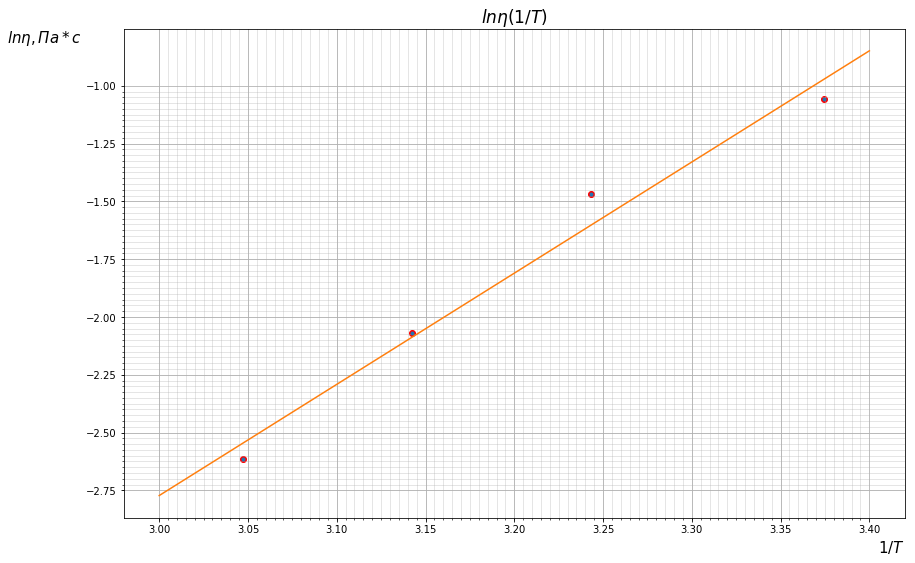

In [108]:
fig = plt.figure(figsize=(14, 9))
ax = fig.gca()
ax.set_xticks(np.arange(3, 3.40, 0.005), minor=True) # это для мелких делений по оси ОХ
ax.set_yticks(np.arange(-2.75, -1.00, 0.025), minor=True) # аналогично для OY
ax.grid(which='minor', alpha=0.4, linestyle='-')

mnk_coef = np.polyfit(inverted_T, ln_eta, 1) # считаем коэфф-ты аппроксимирующей прямой
xp = np.linspace(3, 3.4, 100)
p = np.poly1d(mnk_coef) # создаем полином с коэффициентами (убывающими по степени) из массива mnk_coef_f1
_ = plt.plot(inverted_T, ln_eta, '.', xp, p(xp), '-') # рисуем точки и аппроксимирующую прямую
plt.xlabel('$1/T$', horizontalalignment='right', x = 1, size = 15)
h = plt.ylabel('$ln\eta, Па*c $', verticalalignment='top', 
               horizontalalignment='right', y = 1, size = 15)
h.set_rotation(0)
plt.title('$ln\eta(1/T)$', size = 17)
plt.grid()
plt.scatter(inverted_T, ln_eta, color = 'red')

plt.show()

In [106]:
mnk_coef

array([ 4808.9780363 ,   -17.19939429])

In [102]:
sigma_k = get_rmse_k(inverted_T, ln_eta, mnk_coef[0], 4)
sigma_c = get_rmse_c(inverted_T, ln_eta, sigma_k, 4) 

In [103]:
sigma_k, sigma_c

(0.36406633418943335, 0.04417345043185587)